## Get Sentinel 2 Data on CDSE using ODATA and Boto3

In [2]:
import sys
import os
import pandas as pd
import os
from loguru import logger
import time
import rasterio
import os
import io
import cv2
import numpy as np
from PIL import Image

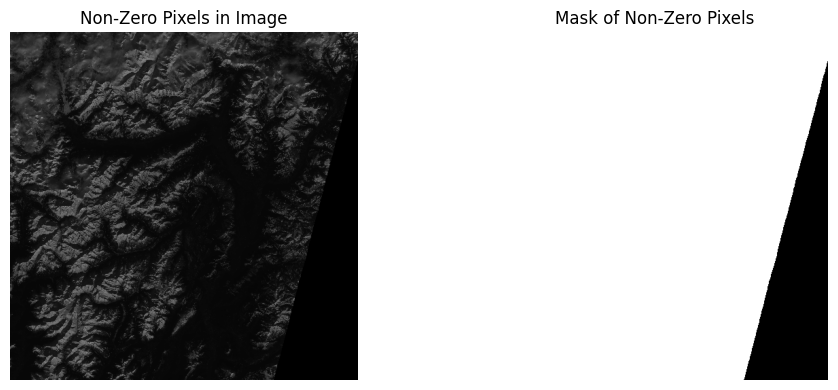

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

path = "/mnt/disk/dataset/sentinel-ai-processor/V2/test/input/S2B_MSIL1C_20220106T102319_N0301_R065_T32TPS_20220106T111539/T32TPS_20220106T102319_B02.png"

# Read and resize image
img = cv2.imread(path)
img = cv2.resize(img, (512, 512))

# Create mask where image is NOT zero (non-black pixels)
mask_nonzero = np.any(img != 0, axis=2)

# Apply mask: keep non-zero pixels, set zero pixels to black
masked_img = np.zeros_like(img)
masked_img[mask_nonzero] = img[mask_nonzero]

# Show masked image
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB))
plt.title("Non-Zero Pixels in Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mask_nonzero, cmap='gray')
plt.title("Mask of Non-Zero Pixels")
plt.axis('off')

plt.tight_layout()
plt.show()


In [6]:
def prepare_paths(path_dir):

    df_input = pd.read_csv(f"{path_dir}/input.csv")
    df_output = pd.read_csv(f"{path_dir}/target.csv")

    df_input["path"] = df_input["Name"].apply(lambda x: os.path.join(path_dir, "input", os.path.basename(x).replace(".SAFE","")))
    df_output["path"] = df_output["Name"].apply(lambda x: os.path.join(path_dir, "target", os.path.basename(x).replace(".SAFE","")))

    return df_input, df_output

In [8]:
version = "V2"
TEST_DIR = f"/mnt/disk/dataset/sentinel-ai-processor/{version}/test/"
df_input, df_output = prepare_paths(TEST_DIR)

Difference > 10% at index 75: 10025.13% different
['/mnt/disk/dataset/sentinel-ai-processor/V2/test/input/S2A_MSIL1C_20190308T102021_N0500_R065_T32TNT_20221111T224128/T32TNT_20190308T102021_B02.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/input/S2A_MSIL1C_20190308T102021_N0500_R065_T32TNT_20221111T224128/T32TNT_20190308T102021_B03.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/input/S2A_MSIL1C_20190308T102021_N0500_R065_T32TNT_20221111T224128/T32TNT_20190308T102021_B04.png']
['/mnt/disk/dataset/sentinel-ai-processor/V2/test/target/S2A_MSIL2A_20190308T102021_N0500_R065_T32TNT_20221123T222853/T32TNT_20190308T102021_B02_10m.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/target/S2A_MSIL2A_20190308T102021_N0500_R065_T32TNT_20221123T222853/T32TNT_20190308T102021_B03_10m.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/target/S2A_MSIL2A_20190308T102021_N0500_R065_T32TNT_20221123T222853/T32TNT_20190308T102021_B04_10m.png']


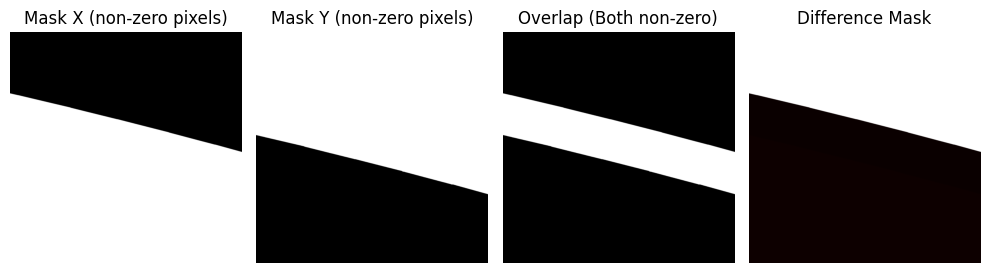

Difference > 10% at index 156: 14103.59% different
['/mnt/disk/dataset/sentinel-ai-processor/V2/test/input/S2A_MSIL1C_20200613T103031_N0500_R108_T32UNA_20230614T210728/T32UNA_20200613T103031_B02.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/input/S2A_MSIL1C_20200613T103031_N0500_R108_T32UNA_20230614T210728/T32UNA_20200613T103031_B03.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/input/S2A_MSIL1C_20200613T103031_N0500_R108_T32UNA_20230614T210728/T32UNA_20200613T103031_B04.png']
['/mnt/disk/dataset/sentinel-ai-processor/V2/test/target/S2A_MSIL2A_20200613T103031_N0500_R108_T32UNA_20230416T172456/T32UNA_20200613T103031_B02_10m.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/target/S2A_MSIL2A_20200613T103031_N0500_R108_T32UNA_20230416T172456/T32UNA_20200613T103031_B03_10m.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/target/S2A_MSIL2A_20200613T103031_N0500_R108_T32UNA_20230416T172456/T32UNA_20200613T103031_B04_10m.png']


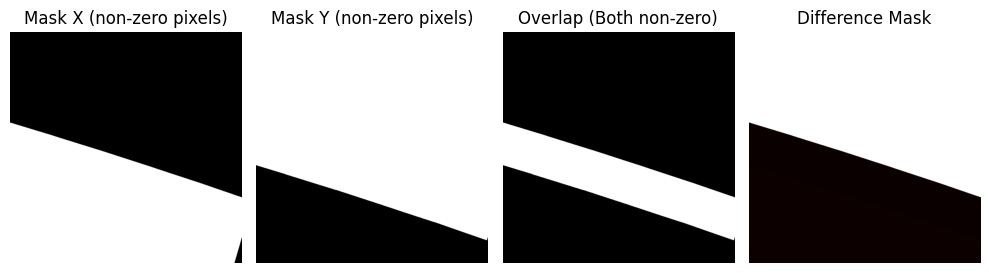

Difference > 10% at index 173: 1972.37% different
['/mnt/disk/dataset/sentinel-ai-processor/V2/test/input/S2B_MSIL1C_20200817T102559_N0500_R108_T31TFN_20230423T190131/T31TFN_20200817T102559_B02.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/input/S2B_MSIL1C_20200817T102559_N0500_R108_T31TFN_20230423T190131/T31TFN_20200817T102559_B03.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/input/S2B_MSIL1C_20200817T102559_N0500_R108_T31TFN_20230423T190131/T31TFN_20200817T102559_B04.png']
['/mnt/disk/dataset/sentinel-ai-processor/V2/test/target/S2B_MSIL2A_20200817T102559_N0500_R108_T31TFN_20230420T222228/T31TFN_20200817T102559_B02_10m.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/target/S2B_MSIL2A_20200817T102559_N0500_R108_T31TFN_20230420T222228/T31TFN_20200817T102559_B03_10m.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/target/S2B_MSIL2A_20200817T102559_N0500_R108_T31TFN_20230420T222228/T31TFN_20200817T102559_B04_10m.png']


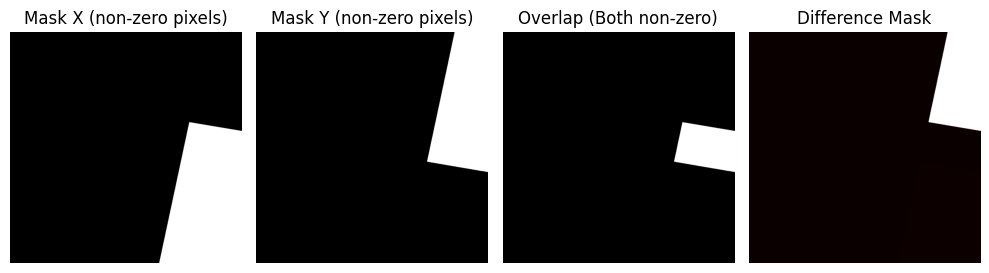

Difference > 10% at index 285: 19.30% different
['/mnt/disk/dataset/sentinel-ai-processor/V2/test/input/S2B_MSIL1C_20220102T104339_N0301_R008_T31TFN_20220102T113621/T31TFN_20220102T104339_B02.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/input/S2B_MSIL1C_20220102T104339_N0301_R008_T31TFN_20220102T113621/T31TFN_20220102T104339_B03.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/input/S2B_MSIL1C_20220102T104339_N0301_R008_T31TFN_20220102T113621/T31TFN_20220102T104339_B04.png']
['/mnt/disk/dataset/sentinel-ai-processor/V2/test/target/S2B_MSIL2A_20220102T104339_N0301_R008_T31TFN_20220102T122433/T31TFN_20220102T104339_B02_10m.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/target/S2B_MSIL2A_20220102T104339_N0301_R008_T31TFN_20220102T122433/T31TFN_20220102T104339_B03_10m.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/target/S2B_MSIL2A_20220102T104339_N0301_R008_T31TFN_20220102T122433/T31TFN_20220102T104339_B04_10m.png']


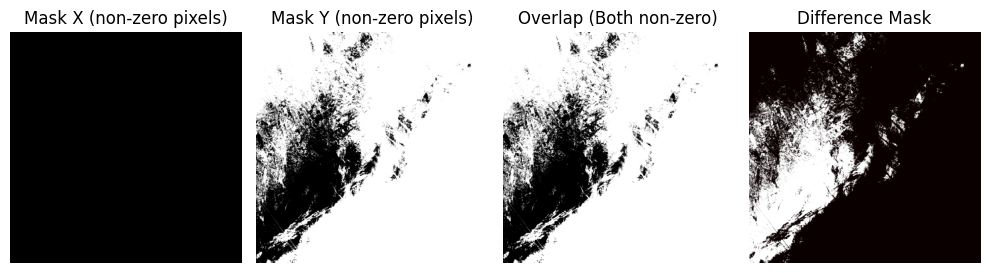

Difference > 10% at index 287: 14.26% different
['/mnt/disk/dataset/sentinel-ai-processor/V2/test/input/S2B_MSIL1C_20220106T102319_N0301_R065_T32TPS_20220106T111539/T32TPS_20220106T102319_B02.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/input/S2B_MSIL1C_20220106T102319_N0301_R065_T32TPS_20220106T111539/T32TPS_20220106T102319_B03.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/input/S2B_MSIL1C_20220106T102319_N0301_R065_T32TPS_20220106T111539/T32TPS_20220106T102319_B04.png']
['/mnt/disk/dataset/sentinel-ai-processor/V2/test/target/S2B_MSIL2A_20220106T102319_N0301_R065_T32TPS_20220106T123401/T32TPS_20220106T102319_B02_10m.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/target/S2B_MSIL2A_20220106T102319_N0301_R065_T32TPS_20220106T123401/T32TPS_20220106T102319_B03_10m.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/target/S2B_MSIL2A_20220106T102319_N0301_R065_T32TPS_20220106T123401/T32TPS_20220106T102319_B04_10m.png']


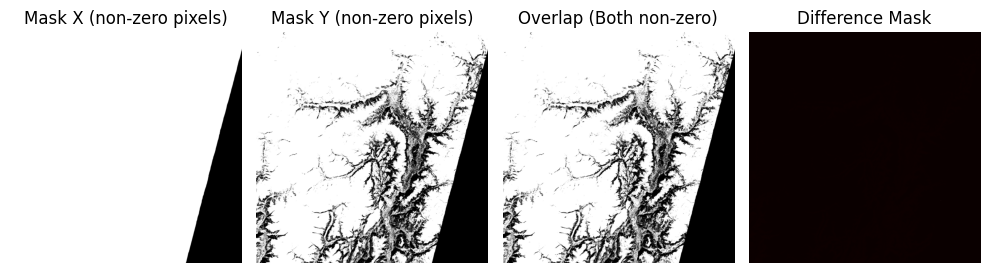

Difference > 10% at index 384: 2424.47% different
['/mnt/disk/dataset/sentinel-ai-processor/V2/test/input/S2A_MSIL1C_20221004T103911_N0400_R008_T31UGP_20221004T141105/T31UGP_20221004T103911_B02.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/input/S2A_MSIL1C_20221004T103911_N0400_R008_T31UGP_20221004T141105/T31UGP_20221004T103911_B03.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/input/S2A_MSIL1C_20221004T103911_N0400_R008_T31UGP_20221004T141105/T31UGP_20221004T103911_B04.png']
['/mnt/disk/dataset/sentinel-ai-processor/V2/test/target/S2A_MSIL2A_20221004T103911_N0400_R008_T31UGP_20221004T182854/T31UGP_20221004T103911_B02_10m.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/target/S2A_MSIL2A_20221004T103911_N0400_R008_T31UGP_20221004T182854/T31UGP_20221004T103911_B03_10m.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/target/S2A_MSIL2A_20221004T103911_N0400_R008_T31UGP_20221004T182854/T31UGP_20221004T103911_B04_10m.png']


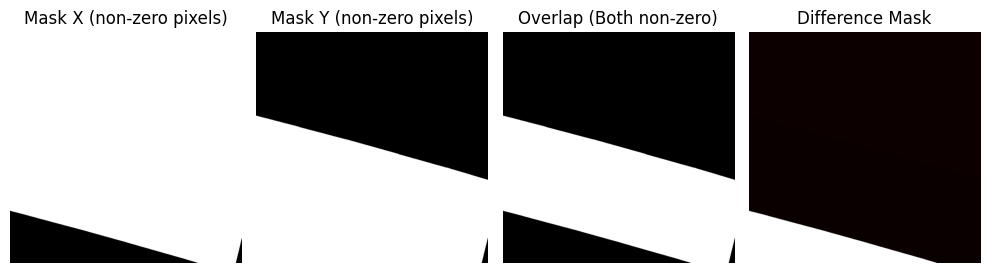

Difference > 10% at index 436: 12.25% different
['/mnt/disk/dataset/sentinel-ai-processor/V2/test/input/S2B_MSIL1C_20230331T104629_N0509_R051_T31TEN_20230331T125112/T31TEN_20230331T104629_B02.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/input/S2B_MSIL1C_20230331T104629_N0509_R051_T31TEN_20230331T125112/T31TEN_20230331T104629_B03.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/input/S2B_MSIL1C_20230331T104629_N0509_R051_T31TEN_20230331T125112/T31TEN_20230331T104629_B04.png']
['/mnt/disk/dataset/sentinel-ai-processor/V2/test/target/S2B_MSIL2A_20230331T104629_N0509_R051_T31TEN_20230331T135550/T31TEN_20230331T104629_B02_10m.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/target/S2B_MSIL2A_20230331T104629_N0509_R051_T31TEN_20230331T135550/T31TEN_20230331T104629_B03_10m.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/target/S2B_MSIL2A_20230331T104629_N0509_R051_T31TEN_20230331T135550/T31TEN_20230331T104629_B04_10m.png']


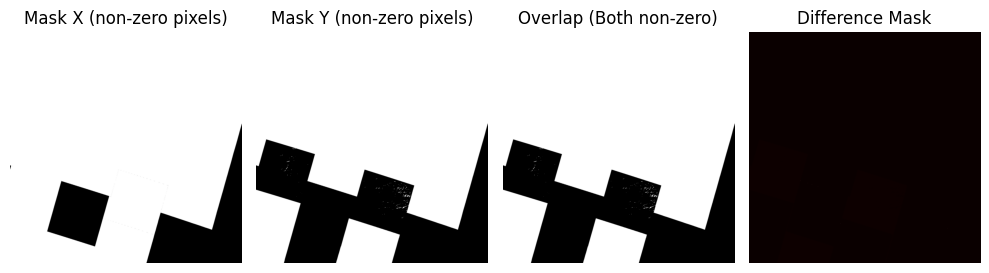

Difference > 10% at index 558: 98.33% different
['/mnt/disk/dataset/sentinel-ai-processor/V2/test/input/S2B_MSIL1C_20240810T100559_N0511_R022_T32TPS_20240810T124659/T32TPS_20240810T100559_B02.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/input/S2B_MSIL1C_20240810T100559_N0511_R022_T32TPS_20240810T124659/T32TPS_20240810T100559_B03.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/input/S2B_MSIL1C_20240810T100559_N0511_R022_T32TPS_20240810T124659/T32TPS_20240810T100559_B04.png']
['/mnt/disk/dataset/sentinel-ai-processor/V2/test/target/S2B_MSIL2A_20240810T100559_N0511_R022_T32TPS_20240810T132043/T32TPS_20240810T100559_B02_10m.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/target/S2B_MSIL2A_20240810T100559_N0511_R022_T32TPS_20240810T132043/T32TPS_20240810T100559_B03_10m.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/target/S2B_MSIL2A_20240810T100559_N0511_R022_T32TPS_20240810T132043/T32TPS_20240810T100559_B04_10m.png']


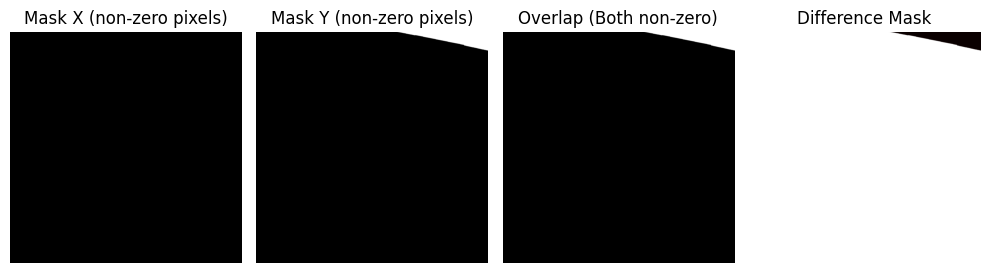

In [15]:
import os
import glob
import cv2
import natsort
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# List to store paths where difference > 10%
diff_exceeds_10 = []

for index in range(len(df_input)):
    input_path = df_input['path'][index]
    output_path = df_output['path'][index]
    x_paths = natsort.natsorted(glob.glob(os.path.join(input_path, "*.png"), recursive=False))
    y_paths = natsort.natsorted(glob.glob(os.path.join(output_path, "*.png"), recursive=False))

    x_data = cv2.imread(x_paths[0])
    y_data = cv2.imread(y_paths[0])

    mask_x = np.any(x_data != 0, axis=2).astype(np.uint8)
    mask_y = np.any(y_data != 0, axis=2).astype(np.uint8)

    diff_mask = np.abs(mask_x - mask_y)
    diff_ratio = np.sum(diff_mask) / diff_mask.size

    if diff_ratio > 0.10:
        print(f"Difference > 10% at index {index}: {diff_ratio:.2%} different")
        print(x_paths)
        print(y_paths)
        # Save paths
        diff_exceeds_10.append({
            'input_path': input_path,
            'output_path': output_path,
            'diff_ratio': diff_ratio
        })
        # Optional: Plot masks (same as before)
        overlap_mask = np.logical_and(mask_x, mask_y).astype(np.uint8)
        fig, axs = plt.subplots(1, 4, figsize=(10, 4))

        axs[0].imshow(mask_x, cmap='gray')
        axs[0].set_title('Mask X (non-zero pixels)')
        axs[0].axis('off')

        axs[1].imshow(mask_y, cmap='gray')
        axs[1].set_title('Mask Y (non-zero pixels)')
        axs[1].axis('off')

        axs[2].imshow(overlap_mask, cmap='gray')
        axs[2].set_title('Overlap (Both non-zero)')
        axs[2].axis('off')

        axs[3].imshow(diff_mask, cmap='hot')
        axs[3].set_title('Difference Mask')
        axs[3].axis('off')

        plt.tight_layout()
        plt.show()
        plt.close()

# Create DataFrame of mismatched paths
df_diff = pd.DataFrame(diff_exceeds_10)